In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

In [8]:

files = os.listdir()

files = [f for f in files if '.txt' in f]
files


['scan_mirror_L_displacement_1.txt',
 'scan_mirror_L_displacement_2.txt',
 'scan_mirror_L_displacement_3.txt',
 'scan_mirror_L_displacement_4.txt',
 'scan_mirror_L_displacement_5.txt',
 'scan_mirror_L_displacement_6.txt',
 'scan_mirror_L_ramp_1.txt',
 'scan_mirror_L_ramp_2.txt',
 'scan_mirror_L_ramp_3.txt',
 'scan_mirror_L_ramp_4.txt',
 'scan_mirror_L_ramp_5.txt',
 'scan_mirror_L_ramp_6.txt',
 'scan_mirror_R_displacement_1.txt',
 'scan_mirror_R_displacement_2.txt',
 'scan_mirror_R_displacement_3.txt',
 'scan_mirror_R_displacement_4.txt',
 'scan_mirror_R_displacement_5.txt',
 'scan_mirror_R_displacement_6.txt',
 'scan_mirror_R_ramp_1.txt',
 'scan_mirror_R_ramp_2.txt',
 'scan_mirror_R_ramp_3.txt',
 'scan_mirror_R_ramp_4.txt',
 'scan_mirror_R_ramp_5.txt',
 'scan_mirror_R_ramp_6.txt']

In [39]:
index = 4

file_ramp_R =  'scan_mirror_R_ramp_%d.txt'%(index)
file_displacement_R =  'scan_mirror_R_displacement_%d.txt'%(index)
file_ramp_L =  'scan_mirror_L_ramp_%d.txt'%(index)
file_displacement_L =  'scan_mirror_L_displacement_%d.txt'%(index)


data_displacement_R = np.loadtxt(file_displacement_R, skiprows=7)
data_ramp_R = np.loadtxt(file_ramp_R, skiprows=7)



displacement_R = data_displacement_R[:,1]
ramp_R = data_ramp_R[:,1]



ramp_to_voltage = 66.7


In [40]:
def load_polytec_data(filename, skiprows=7, column=1):
    return np.loadtxt(filename, skiprows=skiprows)[:,column]



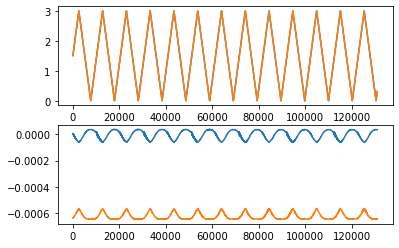

In [66]:
ramp_R = load_polytec_data(file_ramp_R)
displacement_R = load_polytec_data(file_displacement_R)

ramp_L = load_polytec_data(file_ramp_L)
displacement_L = load_polytec_data(file_displacement_L)




fig, axes = plt.subplots(2,1)
plt.sca(axes[0])
plt.plot(ramp_R)
plt.plot(ramp_L)
plt.sca(axes[1])
plt.plot(displacement_R)
plt.plot(displacement_L)


voltage_R = ramp_R*ramp_to_voltage*(-1)
voltage_L = ramp_L*ramp_to_voltage

displacement_R -= displacement_R.max()
displacement_L -= displacement_L.min()

micro = 1e-6

displacement_R /= micro
displacement_L /= micro

distance = 1217

angle_R = np.degrees(np.arctan(displacement_R/distance))
angle_L = np.degrees(np.arctan(displacement_L/distance))


FoV_R = angle_R*2
FoV_L = angle_L*2

Text(0, 0.5, 'Displacement [µm]')

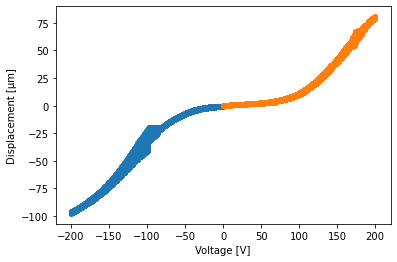

In [67]:

plt.plot(voltage_R, displacement_R, '.')
plt.plot(voltage_L, displacement_L, '.')


plt.xlabel("Voltage [V]")
plt.ylabel("Displacement [µm]")

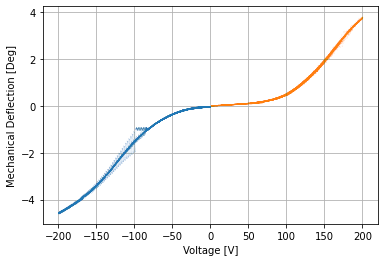

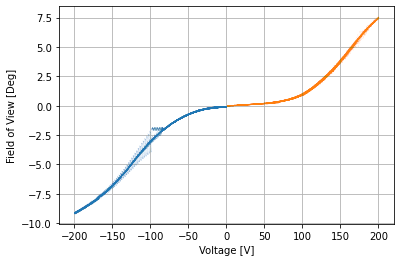

In [89]:
%matplotlib inline

ms = 0.01
plt.plot(voltage_R, angle_R, '.', markersize=ms)
plt.plot(voltage_L, angle_L, '.', markersize=ms)


plt.xlabel("Voltage [V]")
plt.ylabel("Mechanical Deflection [Deg]")
plt.grid(True)

plt.figure()


plt.plot(voltage_R, FoV_R, '.', markersize=ms)
plt.plot(voltage_L, FoV_L,'.', markersize=ms)


plt.xlabel("Voltage [V]")
plt.ylabel("Field of View [Deg]")
plt.grid(True)


# plt.xlim(-130,-160)

# plt.ylim(-2,-6)

In [ ]:
# data_displacement[:,0]==data_ramp[:,0]



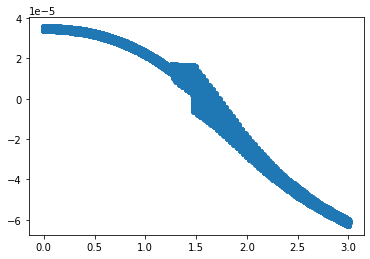

In [21]:
plt.scatter(ramp, displacement)

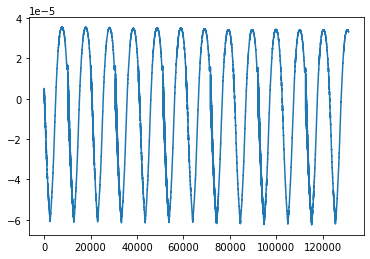

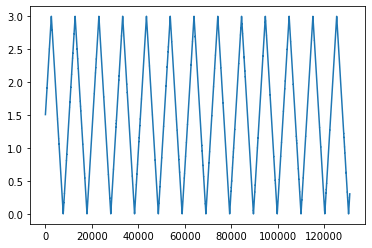

In [24]:
plt.plot(displacement)
plt.figure()
plt.plot(ramp)